In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from datetime import date

In [2]:
adspend = pd.read_csv('homedepot.adspend.csv')

In [3]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF", "", regex=True)

In [4]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace(" \(B\)", "", regex=True)

In [5]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013",Home Depot Home Center & Kidde : Combo Vignette,6.3,0.0,0.0,0.0,6.3,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013",Home Depot Home Center : Home Center/Hardware ...,5128.7,1465.2,1211.8,171.9,348.3,0.0,0.0,238.2,1635.2,58.3,0.0
2,"OCT 07, 2013",Home Depot Home Center : Vignette,2.6,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 14, 2013",Home Depot Home Center & Kidde : Combo Vignette,6.1,0.0,0.0,0.0,6.1,0.0,0.0,0.0,0.0,0.0,0.0
4,"OCT 14, 2013",Home Depot Home Center : Home Center/Hardware ...,4760.4,1753.1,1105.8,91.1,116.9,0.0,0.0,0.0,1635.2,58.3,0.0


In [6]:
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "", regex=True)

In [7]:
list(adspend)

['TIME PERIOD',
 'PRODUCT',
 'TOTAL',
 'NETWORK TV',
 'CABLE TV',
 'SYNDICATION',
 'SPOT TV',
 'MAGAZINES',
 'NATL NEWSP',
 'NEWSPAPER',
 'NETWORK RADIO',
 'NAT SPOT RADIO',
 'OUTDOOR']

In [8]:
adspend['FIXED TIME'] = pd.to_datetime(adspend['TIME PERIOD'])

In [9]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR,FIXED TIME
0,"OCT 07, 2013",Home Depot Home Center & Kidde : Combo Vignette,6.3,0.0,0.0,0.0,6.3,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-07
1,"OCT 07, 2013",Home Depot Home Center : Home Center/Hardware ...,5128.7,1465.2,1211.8,171.9,348.3,0.0,0.0,238.2,1635.2,58.3,0.0,2013-10-07
2,"OCT 07, 2013",Home Depot Home Center : Vignette,2.6,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-07
3,"OCT 14, 2013",Home Depot Home Center & Kidde : Combo Vignette,6.1,0.0,0.0,0.0,6.1,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-14
4,"OCT 14, 2013",Home Depot Home Center : Home Center/Hardware ...,4760.4,1753.1,1105.8,91.1,116.9,0.0,0.0,0.0,1635.2,58.3,0.0,2013-10-14


In [10]:
adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)

In [11]:
list(adspendnoproducts)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SYNDICATION',
 'TOTAL']

In [12]:
adspendnoproducts.index

DatetimeIndex(['2013-10-07', '2013-10-14', '2013-10-21', '2013-10-28',
               '2013-11-04', '2013-11-11', '2013-11-18', '2013-11-25',
               '2013-12-02', '2013-12-09',
               ...
               '2018-07-30', '2018-08-06', '2018-08-13', '2018-08-20',
               '2018-08-27', '2018-09-03', '2018-09-10', '2018-09-17',
               '2018-09-24', '2018-10-01'],
              dtype='datetime64[ns]', name='FIXED TIME', length=261, freq=None)

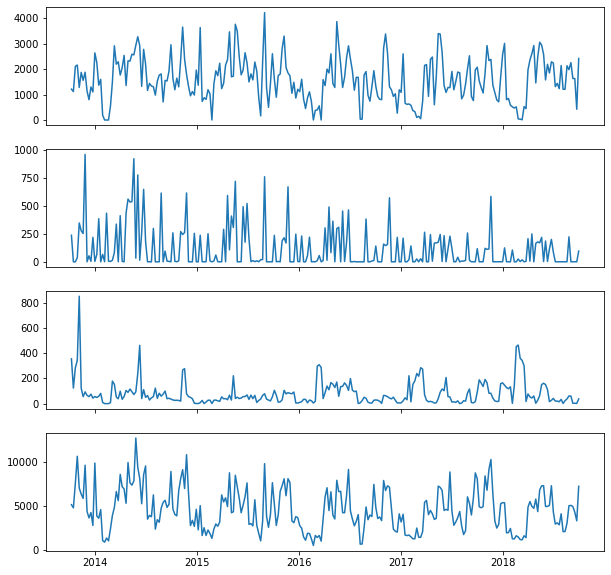

In [13]:
dimensions = (10,10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex='all') #prints axis at the bottom of the 4th graph

ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV'])
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])

In [14]:
testdate = pd.to_datetime("2013-10-07")

In [15]:
testdate.weekday()

0

In [16]:
homedepot = pd.read_csv('homedepot_googletrends.csv', parse_dates = ['period'])

In [17]:
homedepot.set_index('period', inplace=True)

In [18]:
homedepot.head()

,Unnamed: 0,date,value,onediffvalue
period,,,,
2018-10-01,1820,Oct 01 2018,15348.962257,NaN
2018-09-30,1819,Sep 30 2018,19085.352674,3736.390417
2018-09-29,1818,Sep 29 2018,19124.417411,39.064737
2018-09-28,1817,Sep 28 2018,14549.426074,-4574.991337
2018-09-27,1816,Sep 27 2018,14161.482495,-387.943579


In [19]:
homedepotweekly = homedepot.resample('W-MON', closed='left', label='left').mean()
#weekly = W, daily = D, monthly = M

In [20]:
homedepotweekly.head()

,Unnamed: 0,value,onediffvalue
period,,,
2013-10-07,3.0,13562.444781,-137.153207
2013-10-14,10.0,13653.231185,96.334154
2013-10-21,17.0,13789.057289,30.682651
2013-10-28,24.0,13921.063754,-122.811537
2013-11-04,31.0,14834.815243,-246.624368


In [21]:
mergedweeklydata = adspendnoproducts.join(homedepotweekly)

In [22]:
mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue
FIXED TIME,,,,,,,,,,,,,,
2013-10-07,1214.4,0.0,58.3,0.0,1635.2,1465.2,238.2,0.0,354.6,171.9,5137.6,3.0,13562.444781,-137.153207
2013-10-14,1119.7,0.0,58.3,0.0,1635.2,1753.1,0.0,0.0,123.0,91.1,4780.4,10.0,13653.231185,96.334154
2013-10-21,2110.3,0.0,58.3,0.0,1635.2,3304.3,0.0,0.0,282.8,164.9,7555.8,17.0,13789.057289,30.682651
2013-10-28,2163.0,2216.8,91.0,0.0,1500.4,4027.4,36.4,99.0,342.6,149.3,10625.9,24.0,13921.063754,-122.811537
2013-11-04,1281.1,0.0,134.7,0.0,1320.7,3044.9,348.0,0.0,850.4,40.7,7020.5,31.0,14834.815243,-246.624368


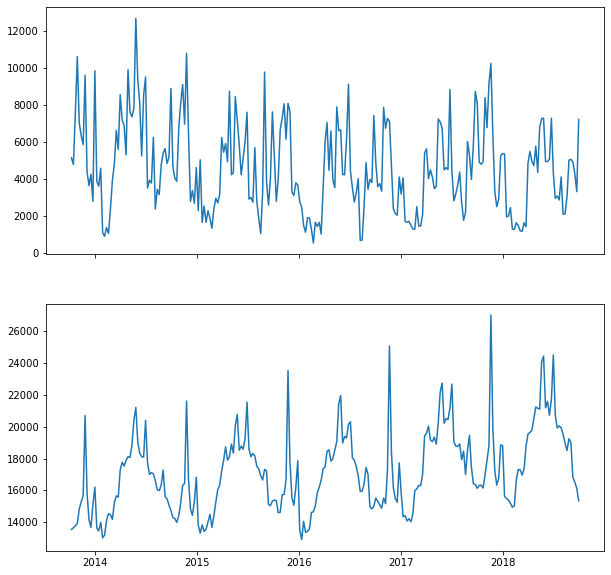

In [23]:
dimensions = (10,10)
fig, (ax1, ax2) = pyplot.subplots(2, figsize=dimensions, sharex='all') #prints axis at the bottom of the 4th graph

ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax2.plot(mergedweeklydata.index, mergedweeklydata['value'])

In [24]:
mergedweeklydata['TOTAL'].corr(mergedweeklydata['value'])
#data needs to be stationary before you can do a conparison

0.4202078786977801

In [30]:
mergedweeklydata['TOTALdiff'] = mergedweeklydata['TOTAL'].diff(1)
mergedweeklydata['valuediff'] = mergedweeklydata['value'].diff(1)

In [31]:
mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue,TOTALdiff,valuediff
FIXED TIME,,,,,,,,,,,,,,,,
2013-10-07,1214.4,0.0,58.3,0.0,1635.2,1465.2,238.2,0.0,354.6,171.9,5137.6,3.0,13562.444781,-137.153207,NaN,NaN
2013-10-14,1119.7,0.0,58.3,0.0,1635.2,1753.1,0.0,0.0,123.0,91.1,4780.4,10.0,13653.231185,96.334154,-357.2,90.786404
2013-10-21,2110.3,0.0,58.3,0.0,1635.2,3304.3,0.0,0.0,282.8,164.9,7555.8,17.0,13789.057289,30.682651,2775.4,135.826104
2013-10-28,2163.0,2216.8,91.0,0.0,1500.4,4027.4,36.4,99.0,342.6,149.3,10625.9,24.0,13921.063754,-122.811537,3070.1,132.006465
2013-11-04,1281.1,0.0,134.7,0.0,1320.7,3044.9,348.0,0.0,850.4,40.7,7020.5,31.0,14834.815243,-246.624368,-3605.4,913.751489


In [29]:
mergedweeklydata['TOTALdiff'].corr(mergedweeklydata['valuediff'])

0.3952482536751732

In [32]:
mergedweeklydata.to_csv('adspend.googletrends.weekly.csv')